In [7]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# CPIAUCSL.csv - US CPI (inflation measure) (market trends)
# RRVRUSQ156N.csv - rental vacancy rate, quarterly (seasonality)
# MORTGAGE30US.csv - mortgage interest rates, weekly (demand signals)
# Metro_median_sale_price_uc_sfrcondo_week.csv - median sale price for US houses
# Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv - Zillow home value index

In [9]:
import pandas as pd

fed_files = ["MORTGAGE30US.csv", "RRVRUSQ156N.csv", "CPIAUCSL.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [10]:
dfs[0]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [ ]:
#Data is weekly

In [11]:
dfs[1]

,RRVRUSQ156N
DATE,
1956-01-01,6.2
1956-04-01,5.9
1956-07-01,6.3
1956-10-01,5.8
1957-01-01,5.3
...,...
2021-04-01,6.2
2021-07-01,5.8
2021-10-01,5.6


In [ ]:
#Data is quarterly

In [12]:
dfs[2]

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2022-03-01,287.708
2022-04-01,288.663
2022-05-01,291.474


In [ ]:
#This data is monthly

In [ ]:
data = pd.concat(dfs,axis=1)
#Merge all the 3 datasets

In [14]:
data

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95
...,...,...,...
2022-07-14,5.51,NaN,NaN
2022-07-21,5.54,NaN,NaN
2022-07-28,5.30,NaN,NaN


In [ ]:
#We use forward filling
#Thus we assume that rental will remain constant for remaining quareter and inflation will remain constant till upcoming month

In [16]:
data = data.ffill()
data.tail(50)

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2021-11-01,3.14,5.6,278.524
2021-11-04,3.09,5.6,278.524
2021-11-10,2.98,5.6,278.524
2021-11-18,3.10,5.6,278.524
2021-11-24,3.10,5.6,278.524
2021-12-01,3.10,5.6,280.126
2021-12-02,3.11,5.6,280.126
2021-12-09,3.10,5.6,280.126
2021-12-16,3.12,5.6,280.126


In [17]:
zillow_files =["Metro_median_sale_price_uc_sfrcondo_week.csv","Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

dfs = [pd.read_csv(f) for f in zillow_files]

In [18]:
dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [19]:
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs]

In [20]:
dfs[0]

,0
2008-02-02,190000.0
2008-02-09,190000.0
2008-02-16,193000.0
2008-02-23,189900.0
2008-03-01,194900.0
...,...
2022-06-11,370000.0
2022-06-18,375000.0
2022-06-25,370000.0
2022-07-02,370000.0


In [21]:
#Reformatted data to remove the first 4 columns and only keep the weekly dates of only first row i.e. US

In [22]:
dfs[1]

,0
1996-01-31,108641.264685
1996-02-29,108472.72888
1996-03-31,108532.280074
1996-04-30,108739.077466
1996-05-31,108986.621607
...,...
2022-03-31,344042.433111
2022-04-30,350515.841789
2022-05-31,354717.722904
2022-06-30,357473.327397


In [ ]:
#Loop to combine house price and house value data 
#house value data comes out monthly whereas house price data comes weekly

In [23]:
for df in dfs:
    #Converting data stored as string to number format
    df.index=pd.to_datetime(df.index)
    #Creating a common column which only takes month
    df["month"]=df.index.to_period("M")

In [25]:
dfs[1]

,0,month
1996-01-31,108641.264685,1996-01
1996-02-29,108472.72888,1996-02
1996-03-31,108532.280074,1996-03
1996-04-30,108739.077466,1996-04
1996-05-31,108986.621607,1996-05
...,...,...
2022-03-31,344042.433111,2022-03
2022-04-30,350515.841789,2022-04
2022-05-31,354717.722904,2022-05
2022-06-30,357473.327397,2022-06


In [ ]:
price_data = dfs[0].merge(dfs[1],on="month")
#Merging both datasets with common column month

In [27]:
price_data.index=dfs[0].index

In [28]:
price_data.head()

,0_x,month,0_y
2008-02-02,190000.0,2008-02,206885.853266
2008-02-09,190000.0,2008-02,206885.853266
2008-02-16,193000.0,2008-02,206885.853266
2008-02-23,189900.0,2008-02,206885.853266
2008-03-01,194900.0,2008-03,205459.521952


In [29]:
del price_data["month"]
price_data.columns=["price","value"]

In [30]:
price_data.head()

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952


In [31]:
data.head()

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1947-01-01,NaN,NaN,21.48
1947-02-01,NaN,NaN,21.62
1947-03-01,NaN,NaN,22.00
1947-04-01,NaN,NaN,22.00
1947-05-01,NaN,NaN,21.95


In [32]:
data = data.dropna()

In [33]:
data.head()

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
1971-04-02,7.33,5.3,40.1
1971-04-09,7.31,5.3,40.1
1971-04-16,7.31,5.3,40.1
1971-04-23,7.31,5.3,40.1
1971-04-30,7.29,5.3,40.1


In [34]:
data.columns=["Mortgage IR","Rental Vacancy Rate","Inflation"]

In [35]:
data.head()

,Mortgage IR,Rental Vacancy Rate,Inflation
DATE,,,
1971-04-02,7.33,5.3,40.1
1971-04-09,7.31,5.3,40.1
1971-04-16,7.31,5.3,40.1
1971-04-23,7.31,5.3,40.1
1971-04-30,7.29,5.3,40.1


In [36]:
from datetime import timedelta

data.index = data.index + timedelta(days=2)

In [ ]:
price_data = data.merge(price_price_price_price_price_price_price_price_price_price_price_price_price_price_price_data, left_index=True, right_index=True)


In [38]:
price_data.head()

,Mortgage IR,Rental Vacancy Rate,Inflation,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952


<Axes: >

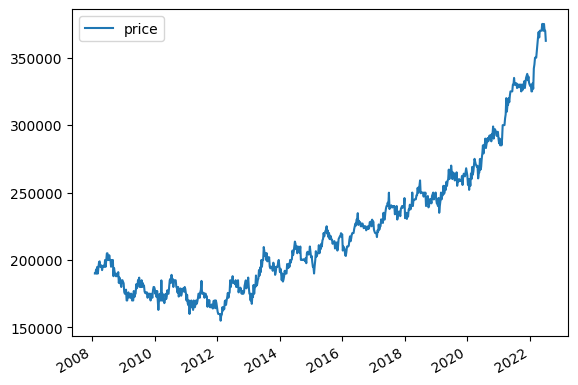

In [39]:
price_data.plot.line(y="price",use_index=True)

In [40]:
price_data["adj_price"]=price_data["price"]/price_data["Inflation"] *100

<Axes: >

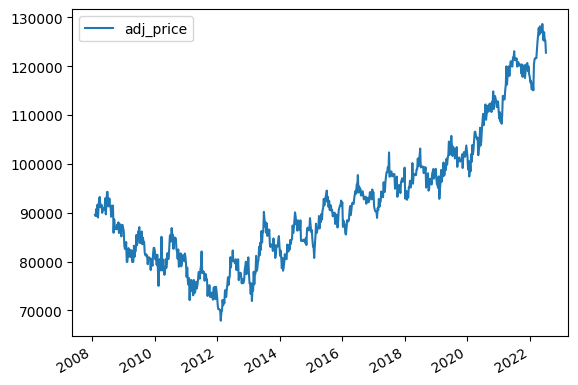

In [41]:
#Adjusting inflation
price_data.plot.line(y="adj_price",use_index=True)

In [43]:
price_data["adj_value"] = price_data["value"] / price_data["Inflation"] * 100


In [48]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)


In [49]:
price_data
#next quarter price of the house is price 3 months from adjusted price

,Mortgage IR,Rental Vacancy Rate,Inflation,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,None
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,None
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,None
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,None


In [50]:
price_data.dropna(inplace=True)
price_data

,Mortgage IR,Rental Vacancy Rate,Inflation,price,value,adj_price,adj_value,next_quarter
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203
...,...,...,...,...,...,...,...,...
2021-12-11,3.10,5.6,280.126,333280.0,327377.250887,118975.032664,116867.85621,121651.118495
2021-12-18,3.12,5.6,280.126,336000.0,327377.250887,119946.024289,116867.85621,121651.118495
2021-12-25,3.05,5.6,280.126,331500.0,327377.250887,118339.604321,116867.85621,123388.991617
2022-01-01,3.11,5.6,280.126,330000.0,332206.79014,117804.130998,118591.915831,125126.864738


In [51]:
#Whether price in the next quarter increase or not
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)
price_data

,Mortgage IR,Rental Vacancy Rate,Inflation,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2021-12-11,3.10,5.6,280.126,333280.0,327377.250887,118975.032664,116867.85621,121651.118495,1
2021-12-18,3.12,5.6,280.126,336000.0,327377.250887,119946.024289,116867.85621,121651.118495,1
2021-12-25,3.05,5.6,280.126,331500.0,327377.250887,118339.604321,116867.85621,123388.991617,1
2022-01-01,3.11,5.6,280.126,330000.0,332206.79014,117804.130998,118591.915831,125126.864738,1


In [52]:
price_data['change'].value_counts()

change
1    367
0    342
Name: count, dtype: int64

In [57]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: >

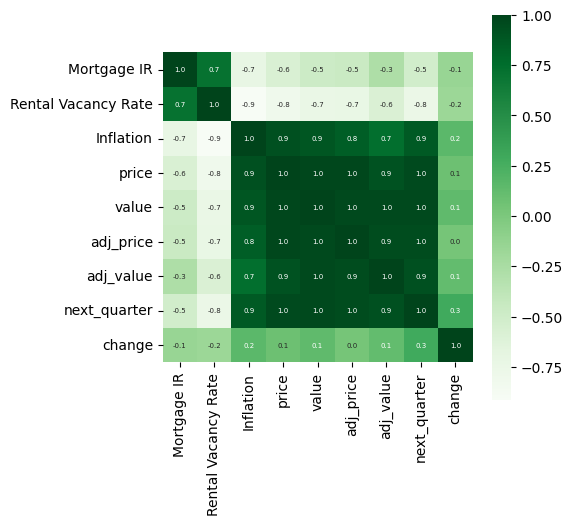

In [62]:

corr=price_data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':5}, cmap='Greens')

In [63]:
price_data

,Mortgage IR,Rental Vacancy Rate,Inflation,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2021-12-11,3.10,5.6,280.126,333280.0,327377.250887,118975.032664,116867.85621,121651.118495,1
2021-12-18,3.12,5.6,280.126,336000.0,327377.250887,119946.024289,116867.85621,121651.118495,1
2021-12-25,3.05,5.6,280.126,331500.0,327377.250887,118339.604321,116867.85621,123388.991617,1
2022-01-01,3.11,5.6,280.126,330000.0,332206.79014,117804.130998,118591.915831,125126.864738,1


In [166]:
price_data.describe()

,Mortgage IR,Rental Vacancy Rate,Inflation,change,month,year,quarter,vacancy_lag_1,vacancy_lag_2,vacancy_lag_3,vacancy_predicted
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,708.000000,707.000000,706.000000,709.000000
mean,4.139619,7.993935,238.064749,0.517630,6.420310,2014.551481,2.473907,7.997034,8.000424,8.003824,7.995666
std,0.799199,1.523147,16.554946,0.500042,3.412081,4.021723,1.107733,1.521986,1.520385,1.518771,1.518600
min,2.650000,5.600000,211.398000,0.000000,1.000000,2008.000000,1.000000,5.600000,5.600000,5.600000,5.602488
25%,3.610000,6.800000,225.395000,0.000000,3.000000,2011.000000,1.000000,6.800000,6.800000,6.800000,6.799065
50%,4.030000,7.300000,237.231000,1.000000,6.000000,2015.000000,2.000000,7.300000,7.300000,7.350000,7.297639
75%,4.560000,9.400000,251.323000,1.000000,9.000000,2018.000000,3.000000,9.400000,9.400000,9.400000,9.391649
max,6.630000,11.100000,281.933000,1.000000,12.000000,2022.000000,4.000000,11.100000,11.100000,11.100000,11.086800


In [66]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ab/a7/0ddaf514ce8a8714f6ed243a2b391b41dbb65251affe21ee3077ec45ea9a/scipy-1.15.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/da/d3/13ee227a148af1c693654932b8b0b02ed64af5e1f7406d56b088b57574cd/joblib-1.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metad


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [129]:
predictors = ["Inflation","Rental Vacancy Rate", "adj_price", "adj_value"]
target = "change"

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train-test split
X = price_data[predictors]
y = price_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)


Accuracy: 90.84507042253522


In [138]:
price_data.tail(1)

,Mortgage IR,Rental Vacancy Rate,Inflation,price,value,adj_price,adj_value,next_quarter,change,month,year,quarter,vacancy_lag_1,vacancy_lag_2,vacancy_lag_3,vacancy_predicted
2022-01-08,3.22,5.8,281.933,329000.0,332206.79014,116694.39193,117831.821795,126445.024128,1,1,2022,1,5.6,5.6,5.6,5.602488


In [150]:
# Assuming current quarter data
sampled_row = price_data.sample(n=1)
sampled_index = sampled_row.index[0]

# Access that specific row from the original DataFrame
selected_row = price_data.loc[sampled_index]

prediction = model.predict(sampled_row[predictors])[0]
vacancy = sampled_row["Rental Vacancy Rate"].values[0]

if prediction == 1:
    if vacancy < 5:
        recommendation = "Increase rent"
    else:
        recommendation = "Slight increase or hold rent"
else:
    if vacancy < 5:
        recommendation = "Hold rent or slight cut"
    else:
        recommendation = "Reduce rent"

print("Model predicts house price will", "rise" if prediction == 1 else "fall", "next quarter.")
print("Rental Vacancy Rate:", vacancy)
print("Rent Pricing Recommendation:", recommendation)


Model predicts house price will rise next quarter.
Rental Vacancy Rate: 9.7
Rent Pricing Recommendation: Slight increase or hold rent


In [151]:
print("Selected row:")
print(price_data.loc[sampled_index])


Selected row:
Mortgage IR                     4.81
Rental Vacancy Rate              9.7
Inflation                    223.046
price                       163000.0
value                  168514.820055
adj_price               73079.095792
adj_value               75551.599246
next_quarter            79179.381333
change                             1
month                              3
year                            2011
quarter                            1
vacancy_lag_1                    9.7
vacancy_lag_2                    9.7
vacancy_lag_3                    9.7
vacancy_predicted           9.690793
Name: 2011-03-26 00:00:00, dtype: object


In [157]:
X = price_data[['Mortgage IR', 'Inflation', 'adj_price', 'adj_value']] # predictors
y = price_data['Rental Vacancy Rate']  # target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [158]:
# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [159]:
# Calculate Mean Squared Error (MSE) and R-squared for the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.3266219213579882
R-squared: 0.8707897179160065


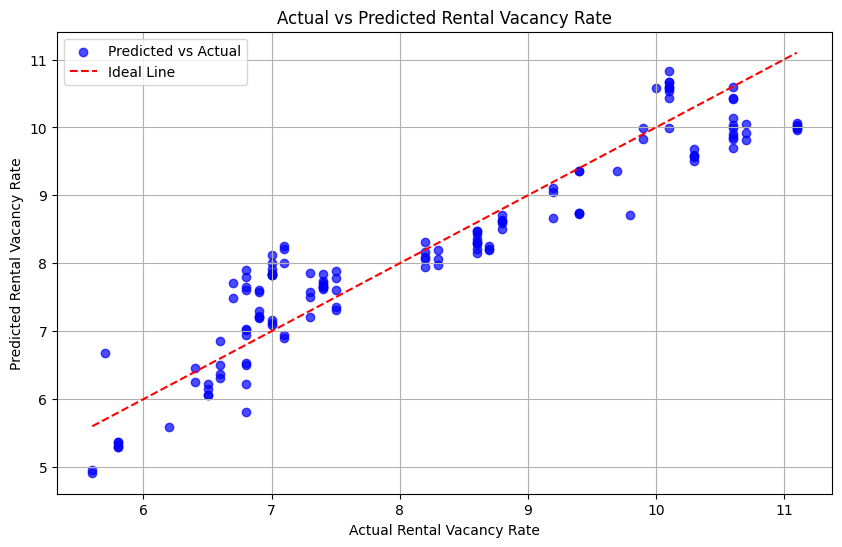

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted Rental Vacancy Rate')
plt.xlabel('Actual Rental Vacancy Rate')
plt.ylabel('Predicted Rental Vacancy Rate')
plt.legend()
plt.grid(True)
plt.show()



In [167]:
# Assuming a simple threshold for vacancy rate to decide promotion
threshold_high_vacancy = 9.4  # For high vacanc
threshold_low_vacancy = 6.8  # For low vacancy

# Define function for promotions based on predicted vacancy rate
def recommend_promotion(predicted_vacancy):
    if predicted_vacancy > threshold_high_vacancy:
        return "Offer: 20% off first 3 months rent!"
    elif predicted_vacancy < threshold_low_vacancy:
        return "Offer: Rent price lock for 2 years!"
    else:
        return "Offer: 10% discount for leases signed within 30 days!"

# Apply recommendations based on the predictions
for i, prediction in enumerate(y_pred):
    print(f"Predicted Vacancy Rate: {prediction:.2f}% -> {recommend_promotion(prediction)}")

Predicted Vacancy Rate: 8.17% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 8.36% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 6.38% -> Offer: Rent price lock for 2 years!
Predicted Vacancy Rate: 8.22% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 8.21% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 9.10% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 7.22% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 10.06% -> Offer: 20% off first 3 months rent!
Predicted Vacancy Rate: 10.54% -> Offer: 20% off first 3 months rent!
Predicted Vacancy Rate: 8.01% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 6.86% -> Offer: 10% discount for leases signed within 30 days!
Predicted Vacancy Rate: 8.29% -> Offer: 10% discount for leases signed within 30 days!
Predicte